In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



#With SkLearn

In [3]:

# Load the dataset from a CSV file
dataset = pd.read_csv('HCV-Egy-Data.csv')
# Define independent variables (X) and dependent variable (Y)
Y = dataset['Baselinehistological staging']
X = dataset.drop(['Baselinehistological staging'], axis=1)



# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Create a Linear Regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_sk = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(Y_test, Y_pred_sk)
r2 = r2_score(Y_test, Y_pred_sk)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 1.292121529496887
R-squared: 0.0032854847012501187


#This code for without SkLearn

> Let The Hypothesis Function for a multiple linear regression is
$$Y = {β_0} + {β_1{X_1}} + … +{β_n{X_n}} + {\epsilon}$$

---





> The value of ${β}$ is
$${β}={(X^TX)}^{-1}X^TY$$


---





> The Mean Squared Error (MSE) is defined as:
$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2$$


---


>The R-squared (R^2) is defined as:
$$R^2 =  \frac{\sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2}{\sum_{i=1}^{n} (Y_i - \bar{Y})^2}$$


---


> $\bar{Y}$ is the mean of all $Y$ values.
$\hat{Y}$ is the predicted $Y$ value for data point $i$.








In [4]:
X_train, X_test = X_train.to_numpy(), X_test.to_numpy()
Y_train, Y_test = Y_train.to_numpy(), Y_test.to_numpy()
# Add a column of ones to the independent variables for the intercept term
X_train_with_intercept = np.column_stack([np.ones(X_train.shape[0]), X_train])

# Calculate the coefficients (weights) using the normal equation
coefficients = np.linalg.inv(X_train_with_intercept.T @ X_train_with_intercept) @ X_train_with_intercept.T @ Y_train


# Make predictions on the test set
X_test_with_intercept = np.column_stack([np.ones(X_test.shape[0]), X_test])
Y_pred = X_test_with_intercept @ coefficients


# Calculate the Mean Squared Error (MSE) for evaluation
mse = np.mean((Y_pred - Y_test) ** 2)
print("Mean Squared Error:", mse)

y_bar = np.mean(Y_test)  # Mean of actual values
ssr = np.sum((Y_pred - y_bar) ** 2)  # Sum of squared residuals
sst = np.sum((Y_test - y_bar) ** 2)  # Total sum of squares
r2 = ssr / sst
print("R-squared:", r2)


Mean Squared Error: 1.29212152949819
R-squared: 0.030628739403930513


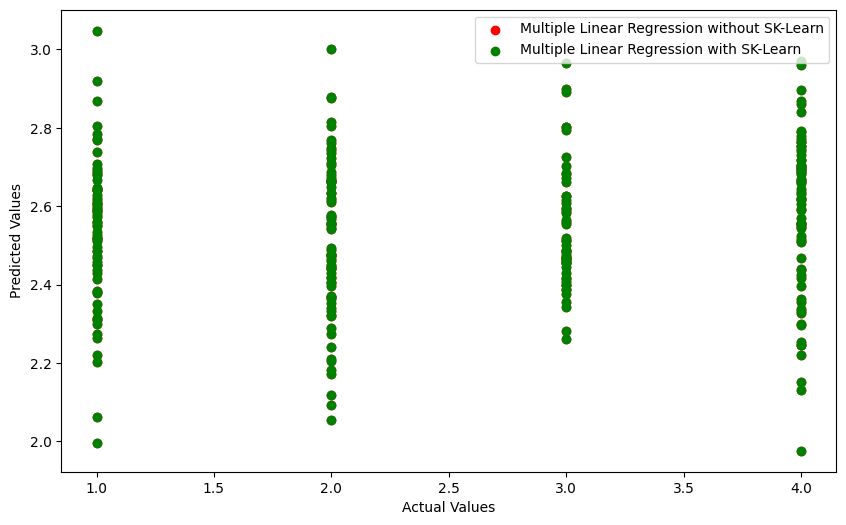

In [8]:
# Plot the predicted vs actual values for both models
plt.figure(figsize=(10, 6))

# Scatter plot for Multivariable Linear Regression without SK-Learn
plt.scatter(Y_test, Y_pred, color='red', label="Multiple Linear Regression without SK-Learn")

# Scatter plot for Multivariable Linear Regression with SK-Learn
plt.scatter(Y_test, Y_pred_sk, color='green', label="Multiple Linear Regression with SK-Learn")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()